In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#doubt
%matplotlib inline  

In [2]:
data = pd.read_csv('Mall_Customers.csv')

# Exploring Data

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
null_values = data.isnull().sum() 

In [6]:
null_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
corr = data.corr()
corr

C:\Users\Sani\AppData\Local\Temp\ipykernel_10372\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


# Heatmap & Exploratory Data Analysis

<Axes: >

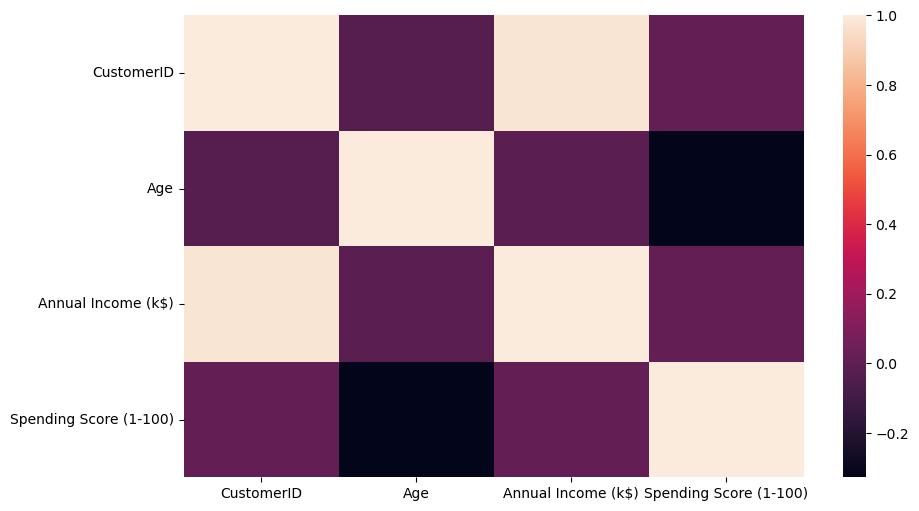

In [8]:
plt.figure(figsize = (10,6))
heatmap = sns.heatmap(corr)
heatmap

# Distirubution of Annual Income

Text(16.694444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

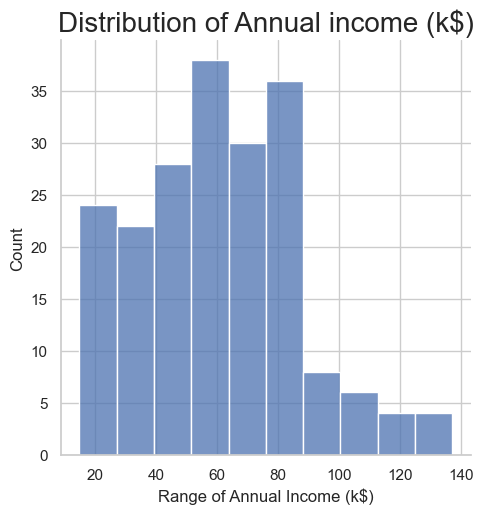

In [21]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid' )
sns.displot(data['Annual Income (k$)']) #represent data in histogram form
plt.title('Distribution of Annual income (k$)',fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

# Distribution of Age

Text(16.694444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

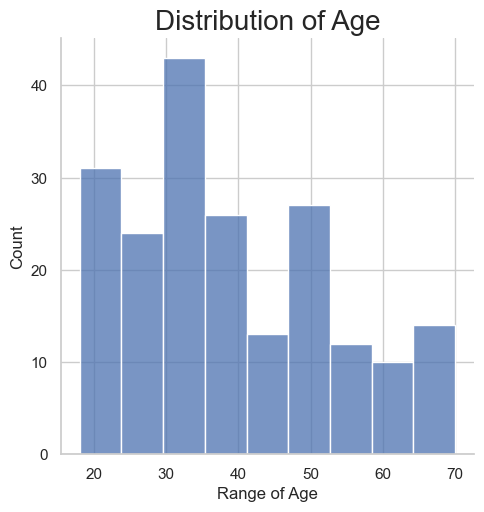

In [22]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid' )
sns.displot(data['Age']) #represent data in histogram form
plt.title('Distribution of Age',fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

# Distribution of Spending Score

Text(16.694444444444443, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

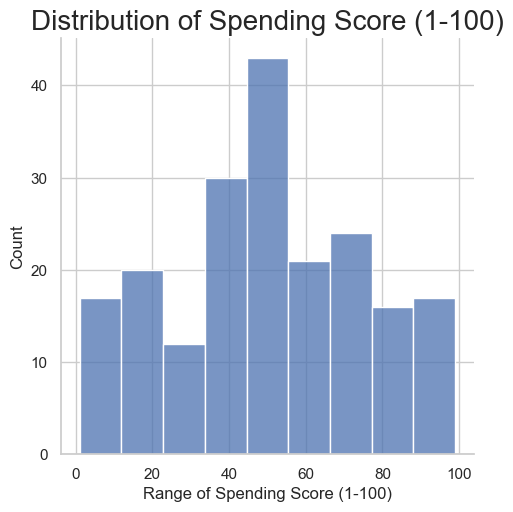

In [23]:
plt.figure(figsize = (10,6))
sns.set(style = 'whitegrid' )
sns.displot(data['Spending Score (1-100)']) #represent data in histogram form
plt.title('Distribution of Spending Score (1-100)',fontsize = 20)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count')

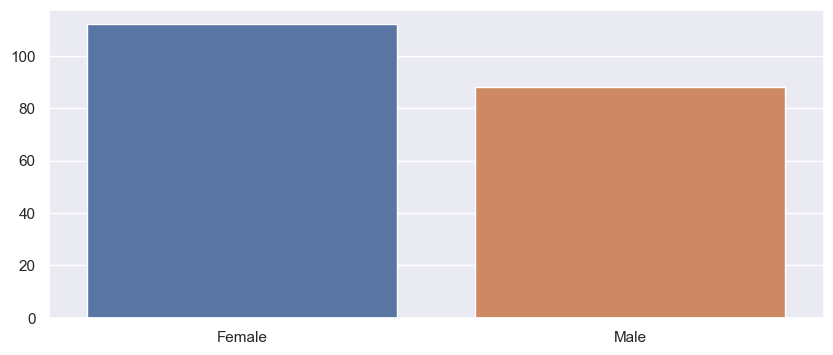

In [27]:
genders = data.Gender.value_counts()
sns.set_style('darkgrid')
plt.figure(figsize = (10,4))
sns.barplot(x = genders.index , y = genders.values)
plt.show()

# we take just anuual income & spending score

In [31]:
X = data[['Annual Income (k$)','Spending Score (1-100)']]

In [32]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Scatterplot of the input data

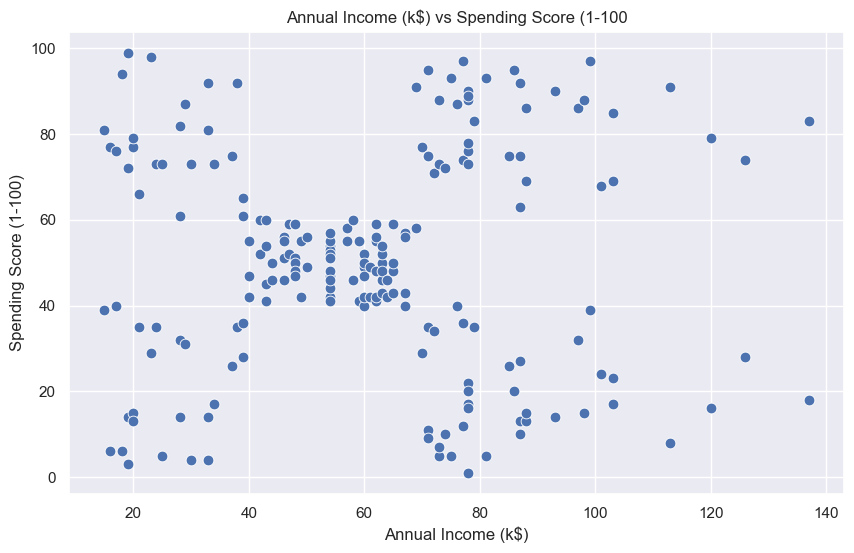

In [33]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',data = X
                , s = 60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income (k$) vs Spending Score (1-100')

plt.show()

# import kmeans from sklearn

In [34]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters = 2,random_state = 0).fit(X)
y = kmeans.labels_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

# Adding the table to a column named label

In [63]:
data["label"] = y

In [64]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


# Scatter plot with two clusters

C:\Users\Sani\AppData\Local\Temp\ipykernel_10372\2886563764.py:2: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x ='Annual Income (k$)', y = 'Spending Score (1-100)',hue = "label",


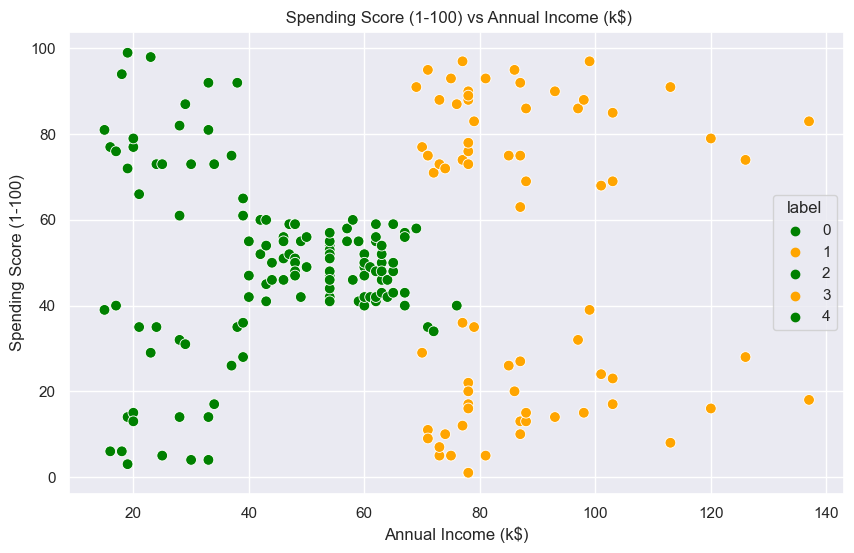

In [65]:
plt.figure(figsize = (10,6))
sns.scatterplot(x ='Annual Income (k$)', y = 'Spending Score (1-100)',hue = "label",
               palette = ['green','orange'],legend = 'full', data = data , s = 60
               )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(' Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# WCSS use to find right value for k

In [66]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

# The elbow curve

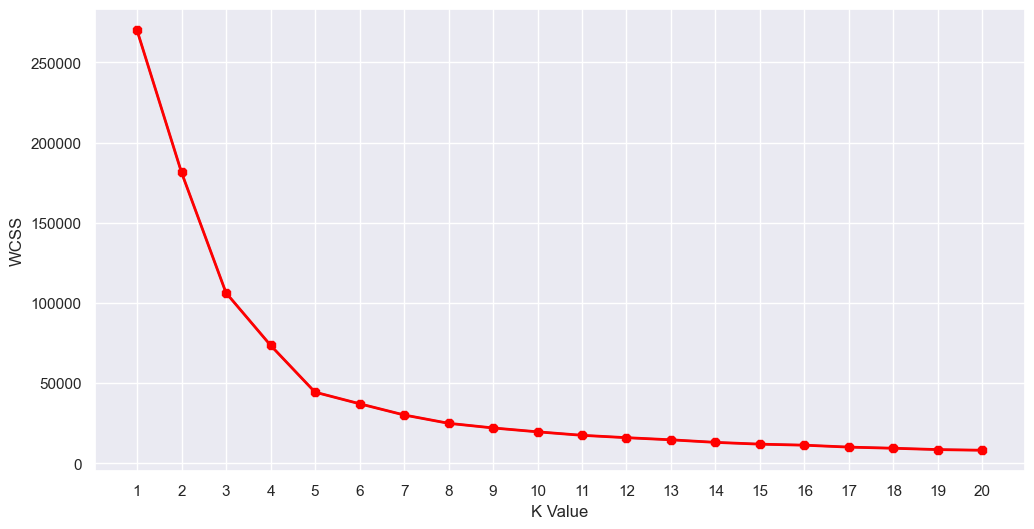

In [67]:
plt.figure(figsize = (12,6))
plt.plot(range(1,21),wcss)
plt.plot(range(1,21),wcss,linewidth = 2, color = "red",marker = '8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel('WCSS')
plt.show()

# K-means With model Training with 5 clusters

In [68]:
#Taking 5 clusters
kmeans_wcss = KMeans(n_clusters = 5)
kmeans_wcss.fit(X)
y = kmeans_wcss.predict(X)
data["label"] = y
data.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


# Scatter plot with 5 cluster(ref.to Elbow Curve value)



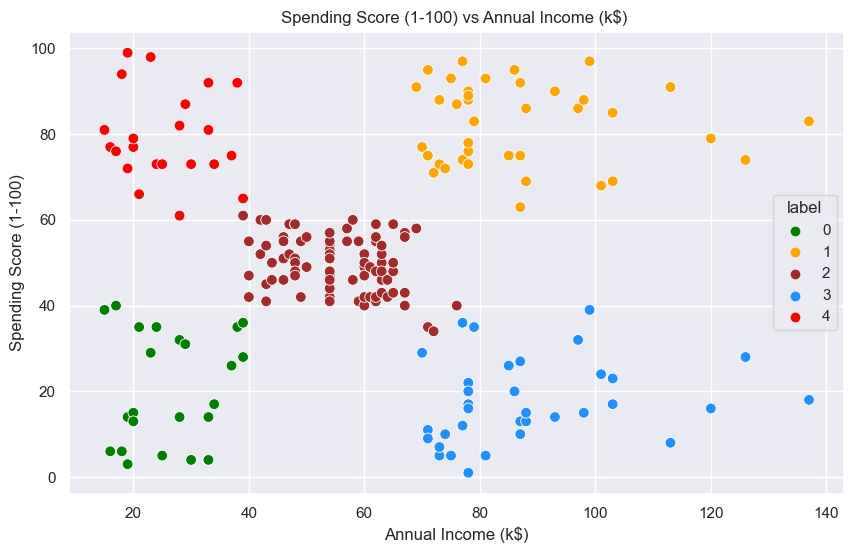

In [69]:
#scatter plot of the clusters
plt.figure(figsize = (10,6))
sns.scatterplot(x ='Annual Income (k$)', y = 'Spending Score (1-100)',hue = "label",
               palette = ['green','orange','brown','dodgerblue','red'],legend = 'full', data = data , s = 60
               )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$) ')
plt.show()

# Using K-Means++ for Elbow Curve & finding out the diffrence

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

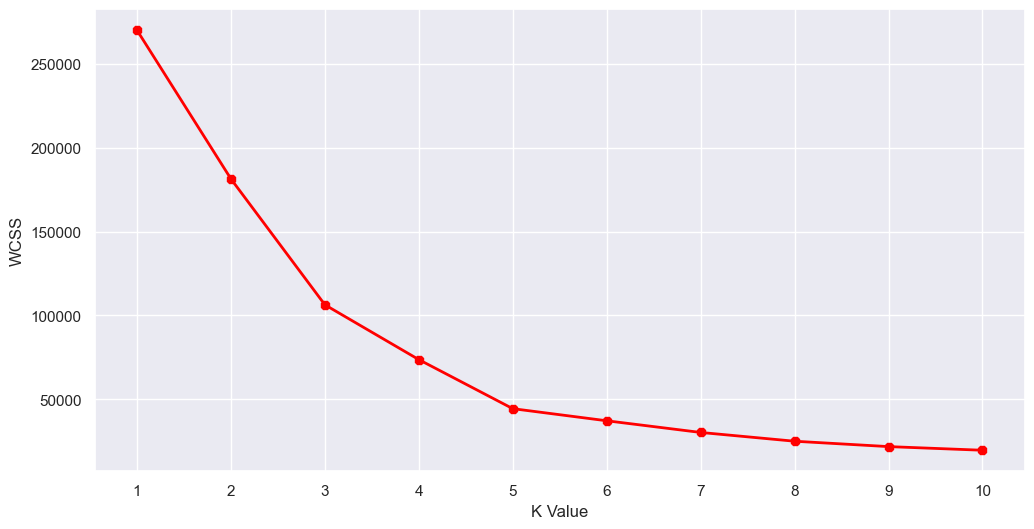

In [78]:
#Taking the features
X1 = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate wcss for diffrent values of k
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.plot(range(1,11),wcss,linewidth = 2, color = "red",marker = '8')
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS')
plt.show()


# Here also we choose % cluster as per the elbow curve

In [81]:
#we choose the k for which wcss start to diminish
kmeans2 = KMeans(n_clusters = 5)
y2 = kmeans2.fit_predict(X1)
data["label"] = y2
data.head()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,4
2,3,Female,20,16,6,2
3,4,Female,23,16,77,4
4,5,Female,31,17,40,2


# 3D plot for the selected 3 features

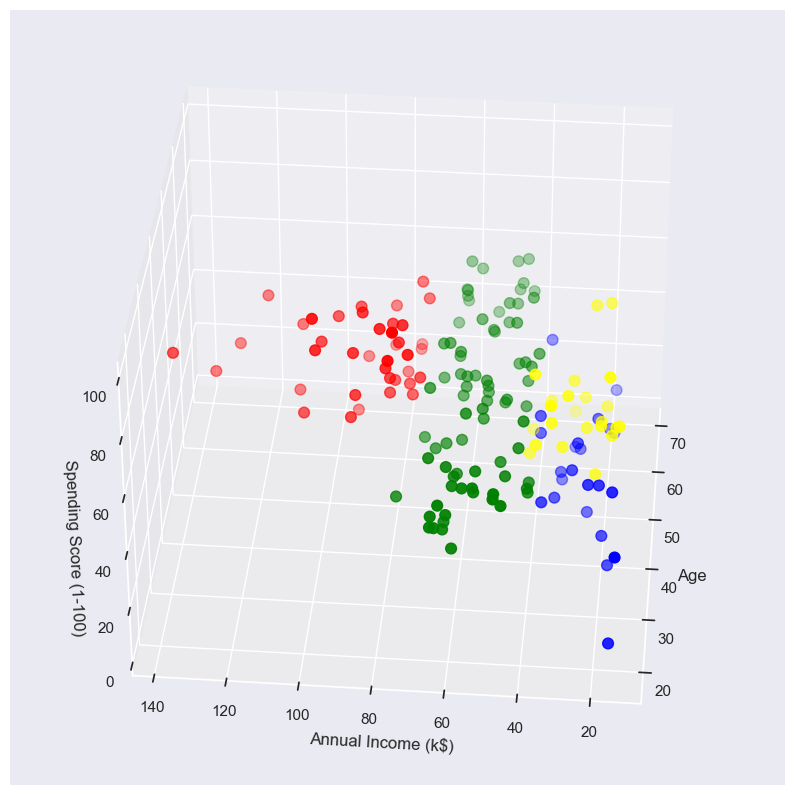

In [85]:
#3d plot as we did the clustering on the basis of 3 simple feature
fig = plt.figure(figsize = (10,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(data.Age[data.label == 1],data['Annual Income (k$)'][data.label == 1],data['Spending Score (1-100)']
           [data.label == 1],c = "red",s = 60)
ax.scatter(data.Age[data.label == 2],data['Annual Income (k$)'][data.label == 2],data['Spending Score (1-100)']
           [data.label == 2],c = "blue",s = 60)
ax.scatter(data.Age[data.label == 3],data['Annual Income (k$)'][data.label == 3],data['Spending Score (1-100)']
           [data.label == 3],c = "green",s = 60)
ax.scatter(data.Age[data.label == 4],data['Annual Income (k$)'][data.label == 4],data['Spending Score (1-100)']
           [data.label == 4],c = "yellow",s = 60)
ax.view_init(35,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# Number of customer from each cluster

In [87]:
cust1 = data[data['label'] == 1]
print("Number of customer in 1st group=",len(cust1))
print('They are -',cust1["CustomerID"].values)
print("----------------------------------------")
cust2 = data[data['label'] == 2]
print("Number of customer in 2nd group=",len(cust2))
print('They are -',cust2["CustomerID"].values)
print("----------------------------------------")
cust3 = data[data['label'] == 0]
print("Number of customer in 3rd group=",len(cust3))
print('They are -',cust3["CustomerID"].values)
print("----------------------------------------")
cust4 = data[data['label'] == 3]
print("Number of customer in 4th group=",len(cust4))
print('They are -',cust4["CustomerID"].values)
print("----------------------------------------")
cust5 = data[data['label'] == 4]
print("Number of customer in 5th group=",len(cust5))
print('They are -',cust5["CustomerID"].values)
print("----------------------------------------")

Number of customer in 1st group= 39
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
----------------------------------------
Number of customer in 2nd group= 23
They are - [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
----------------------------------------
Number of customer in 3rd group= 36
They are - [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
----------------------------------------
Number of customer in 4th group= 79
They are - [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 12